In [1]:
!pip install -q transformers

     |████████████████████████████████| 3.8 MB 3.3 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 895 kB 43.8 MB/s 
     |████████████████████████████████| 6.5 MB 27.2 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import gensim
from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
from transformers import BertForQuestionAnswering, AutoTokenizer

modelname = 'deepset/bert-base-cased-squad2'

model = BertForQuestionAnswering.from_pretrained(modelname)
tokenizer = AutoTokenizer.from_pretrained(modelname)

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/152 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [4]:
from transformers import pipeline
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)

In [12]:
context = "The Intergovernmental Panel on Climate Change (IPCC) is a scientific intergovernmental body under the auspices of the United Nations, set up at the request of member governments. It was first established in 1988 by two United Nations organizations, the World Meteorological Organization (WMO) and the United Nations Environment Programme (UNEP), and later endorsed by the United Nations General Assembly through Resolution 43/53. Membership of the IPCC is open to all members of the WMO and UNEP. The IPCC produces reports that support the United Nations Framework Convention on Climate Change (UNFCCC), which is the main international treaty on climate change. The ultimate objective of the UNFCCC is to \"stabilize greenhouse gas concentrations in the atmosphere at a level that would prevent dangerous anthropogenic [i.e., human-induced] interference with the climate system\". IPCC reports cover \"the scientific, technical and socio-economic information relevant to understanding the scientific basis of risk of human-induced climate change, its potential impacts and options for adaptation and mitigation.\""

answer = nlp({
    'question': 'What organization is the IPCC a part of?',
    'context': context
})

In [15]:
answer['answer']

'United Nations'

In [2]:
import nltk
import numpy as np
import random
import string # to process standard python strings

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [3]:
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
%cd C:\Users\hag8665\Desktop\MSDS 453\Final project

C:\Users\hag8665\Desktop\MSDS 453\Final project


In [5]:
f=open('corpus.txt','r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase


In [6]:
from nltk.tokenize import BlanklineTokenizer

In [7]:
sent_tokens= BlanklineTokenizer().tokenize(raw)

In [8]:
import re

In [9]:
def clean_text(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [35]:
clean_token=[]
for i in sent_tokens:
  clean_token.append(clean_text(i))

In [36]:
counts = pd.DataFrame(clean_token)[0].str.findall(r"(\w+)").explode().value_counts()

In [37]:
print ("After Stopword removal and lemmitization: Total number of words= {} : Total number of unque words= {}". format(counts.values.sum(), counts.shape[0]))

After Stopword removal and lemmitization: Total number of words= 5086 : Total number of unque words= 939


In [38]:
counts = counts[:100]

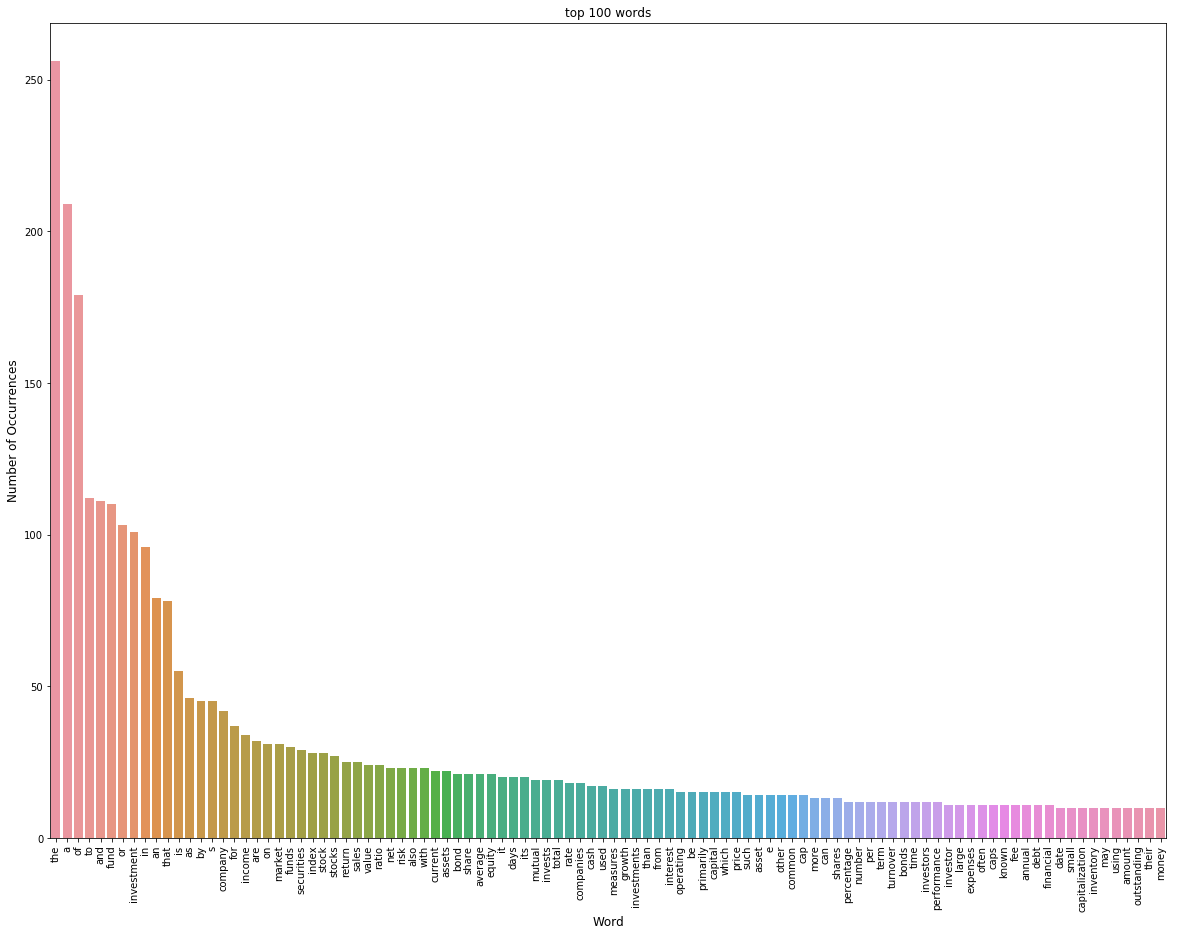

In [39]:
fig, ax = plt.subplots(figsize=(20,15))
sns.barplot(x=counts.index, y=counts.values, ax=ax).set_title("top 100 words")
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.xaxis.set_tick_params(rotation=90)

In [40]:
vectorizer = TfidfVectorizer( use_idf=True, norm=None, lowercase=False)
transformed_documents = vectorizer.fit_transform(clean_token)
transformed_documents_as_array = transformed_documents.toarray()

In [52]:
transformed_documents#[-1]

<165x926 sparse matrix of type '<class 'numpy.float64'>'
	with 3791 stored elements in Compressed Sparse Row format>

In [41]:
words_tfidf = vectorizer.get_feature_names()
matrix_tfidf=pd.DataFrame(transformed_documents.toarray(), columns=words_tfidf)

C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# get count and mean tfidf scors

In [42]:
meantfidf = matrix_tfidf.mean().transpose().reset_index()
meantfidf.columns = ['word', 'counts']
meantfidf.sort_values("counts",ascending = False , inplace =True)
meantfidf.round(3).head(10)

,word,counts
839,the,2.055
569,of,1.521
360,fund,1.292
59,and,1.198
856,to,1.141
452,investment,1.123
587,or,1.112
413,in,1.029
57,an,0.913
838,that,0.874


# Top 10 tfidf mean highest scores

In [43]:

frequenciestfidf = matrix_tfidf.mean().transpose().reset_index()
frequenciestfidf.columns = ['word', 'mean_tfidf_score']
frequenciestfidf.sort_values("mean_tfidf_score",ascending = False , inplace =True)
frequenciestfidf.head(10).round(3).reset_index()

,index,word,mean_tfidf_score
0,839,the,2.055
1,569,of,1.521
2,360,fund,1.292
3,59,and,1.198
4,856,to,1.141
5,452,investment,1.123
6,587,or,1.112
7,413,in,1.029
8,57,an,0.913
9,838,that,0.874


In [44]:
matrix_tfidf.T

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
years,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
yield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.451387,0.0
yields,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
york,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Calculates the Cosine Similarity per word TFIDF matrix¶

In [55]:
# Calculates the Cosine Similarity across your corpus using TFIDF matrix

# doc_term_matrix = transformed_documents.todense()
# df = pd.DataFrame(doc_term_matrix, 
#                       columns=vectorizer.get_feature_names())
   
similarity  = cosine_similarity(matrix_tfidf.T,matrix_tfidf.T)

# Heatmap of TFIDF Cosine Similarity by word

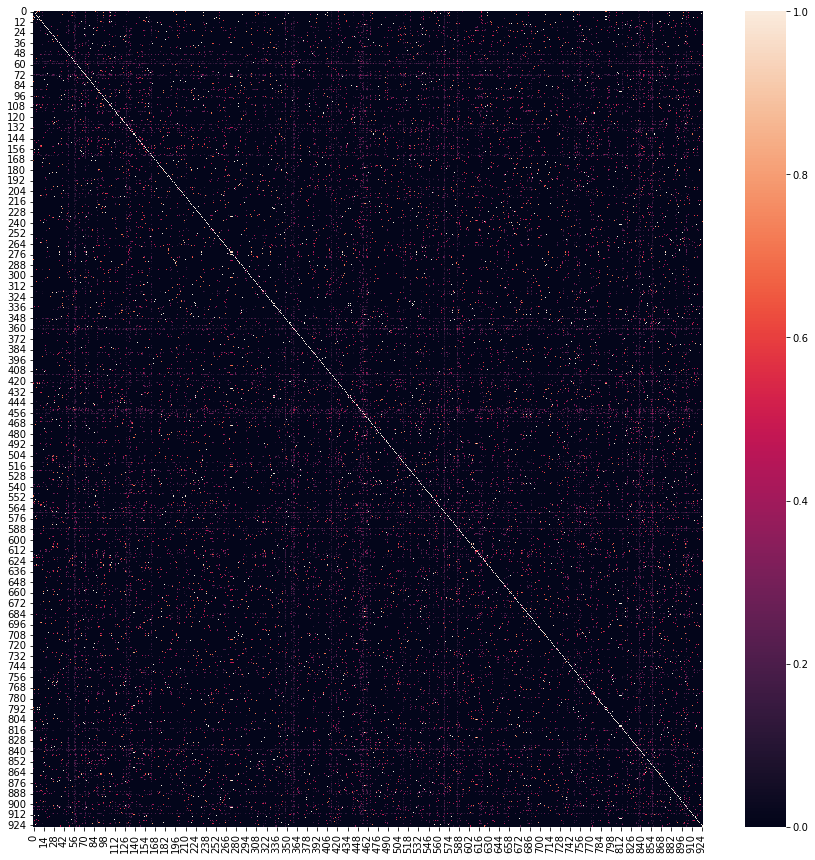

In [56]:
# Heatmap of TFIDF Cosine Similarity of Documents

#similarity  = cosine_similaritymatrix_tfidf,matrix_tfidf)
a4_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=similarity);

# Calculates the Cosine Similarity across your corpus using TFIDF matrix

In [62]:
doc_term_matrix = transformed_documents.todense()
df = pd.DataFrame(doc_term_matrix, 
                      columns=vectorizer.get_feature_names())
   
similarity  = cosine_similarity(df, df)

C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Heatmap of TFIDF Cosine Similarity of Documents

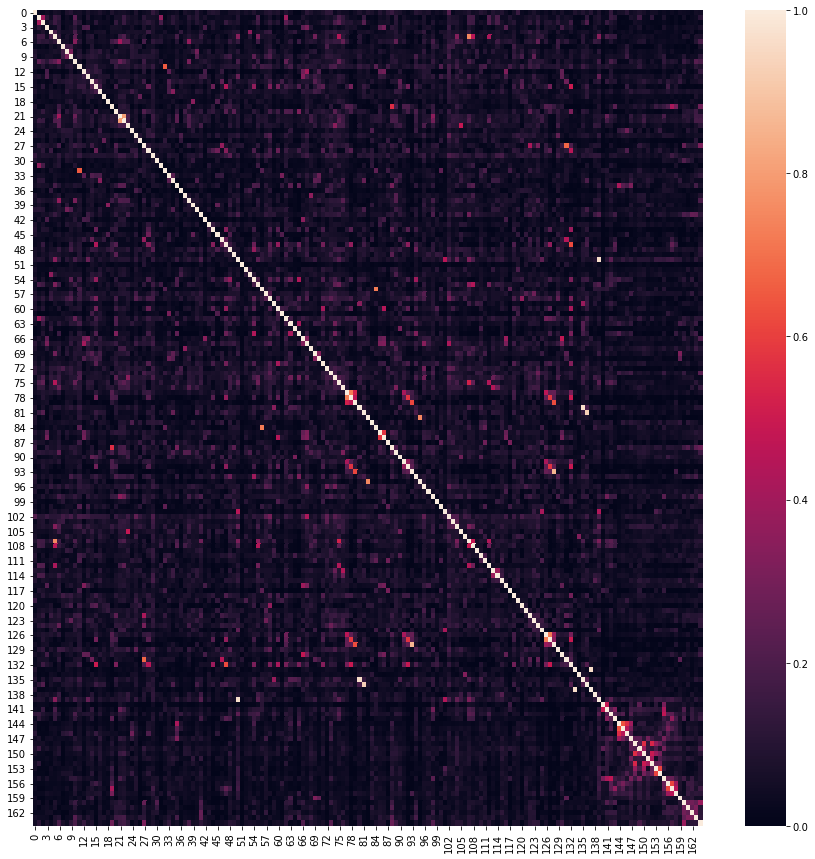

In [37]:
similarity  = cosine_similarity(df, df)
a4_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=similarity);

# <font color='red'> method word2vec =300

In [63]:
processed_text=[]
for i in clean_token:
    #for k in i.split():
        processed_text.append(i.split())


In [64]:
#word to vec
model_w2v = Word2Vec(processed_text, size=300, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in clean_token:
    for k in i.split():
        processed_text_w2v.append(k)


In [65]:

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
range,0.000313,0.001402,0.000146,0.001646,-0.000616,-0.001621,0.000768,-0.001372,-0.000210,-0.000569,...,-0.000821,0.000947,-0.000787,0.000856,0.000893,0.001249,0.000640,-0.001473,0.000423,0.000362
end,0.000401,-0.000251,0.000026,0.001053,0.002394,-0.002418,0.001846,-0.000640,-0.000436,0.001724,...,-0.000062,-0.001075,0.000054,0.000533,0.000735,-0.000639,0.001404,-0.000650,-0.001560,-0.001571
particular,-0.001705,0.001480,-0.000213,0.001424,0.001250,0.000268,-0.000670,0.000456,0.001174,0.000040,...,0.000297,-0.001792,-0.001214,0.001047,-0.001053,0.000746,0.001879,-0.001124,-0.002073,-0.000971
insurance,-0.002451,-0.000819,-0.000609,0.001060,-0.000473,-0.002400,0.000622,-0.001086,-0.001611,0.000195,...,-0.000191,-0.001692,0.000488,0.002335,-0.001253,0.001578,0.000333,-0.002673,-0.002860,0.000235
who,-0.000955,-0.001426,-0.000808,-0.000466,-0.000579,0.000793,-0.001203,-0.000391,-0.001226,-0.000935,...,-0.000254,-0.001430,0.000405,0.000926,0.001315,0.001716,0.000615,-0.002702,-0.002090,-0.001531


# Heatmap of Cosine Similarity of word2vec

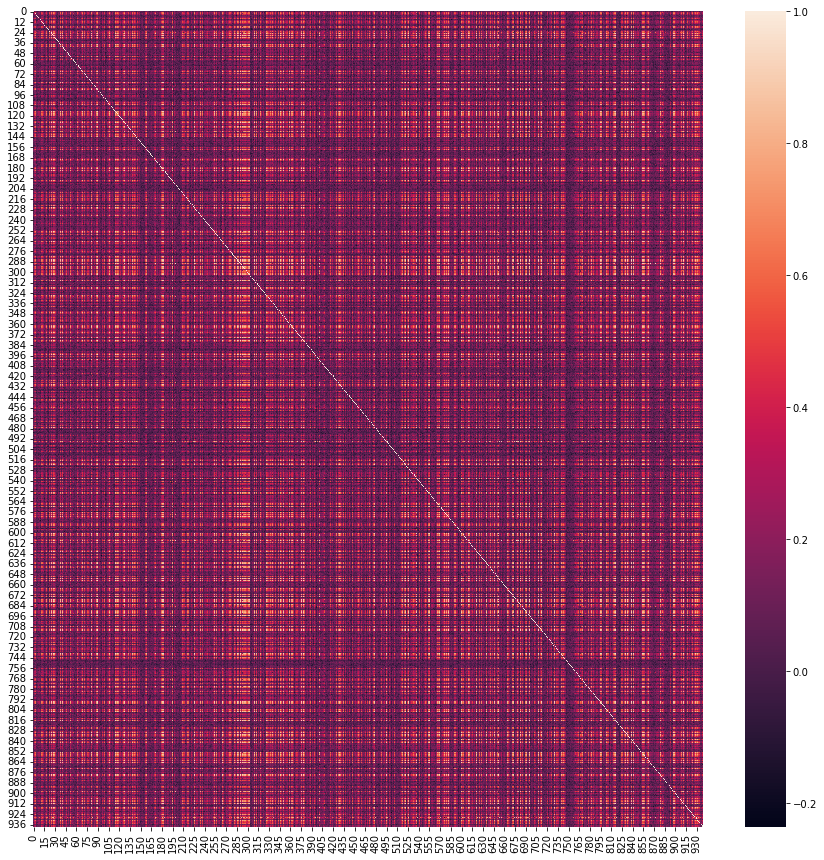

In [66]:
similarity  = cosine_similarity(w2v_df, w2v_df)
a4_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=similarity);

In [67]:
w2v_df.shape

(939, 300)

#   <font color='red'> method doc2vec is 300 

### Create Doc2Vec Embedding

In [68]:
documents  = [TaggedDocument(doc, [i]) for i, doc in enumerate(clean_token)]


In [69]:
model = Doc2Vec(documents, vector_size=300, window=3, min_count=1, workers=4, epochs= 500)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

#doc_titles={'title': titles}
#t=pd.DataFrame(doc_titles)

#doc2vec_df=pd.concat([t, doc2vec_df], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

doc2vec_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.001495,-0.000272,-0.000486,0.000588,0.000163,0.000868,0.001191,0.000383,-0.000676,-0.001278,...,-0.001115,-0.001341,-0.000519,0.000045,-0.000618,0.000632,-0.000779,-0.000106,-0.001179,-0.000152
1,0.000874,-0.001561,-0.000940,-0.001114,0.000296,0.001401,0.001211,-0.000775,0.000018,0.000771,...,-0.000463,-0.000072,0.001262,-0.001013,-0.000323,0.000637,0.001154,0.000190,0.000340,0.001101
2,0.000591,-0.000299,0.000477,0.000544,0.000824,0.001361,-0.000929,-0.000454,0.001432,-0.001353,...,-0.000861,0.000170,0.000356,0.000187,-0.000339,-0.001341,0.000200,-0.000125,-0.001595,0.001005
3,0.000614,-0.000349,-0.000417,0.000847,0.001529,-0.000607,0.001110,-0.000630,0.000934,-0.000246,...,-0.000884,-0.000722,-0.001316,-0.001486,-0.000031,-0.001606,-0.000939,0.000764,-0.000676,-0.000205
4,0.023857,0.212645,0.079765,-0.275232,-0.193148,0.208874,0.003356,0.128039,0.598732,0.117820,...,-0.052817,0.626541,0.276876,-0.360294,0.141059,-0.117728,0.315465,0.065038,0.097001,-0.015433
5,0.077493,-0.011210,0.021661,-0.012198,0.051516,-0.045611,-0.097238,-0.157977,0.198891,0.058232,...,-0.005252,0.106360,0.070423,-0.061749,0.026096,-0.035886,-0.005590,-0.002820,0.023163,-0.061862
6,-0.000183,-0.000033,0.000823,0.001535,-0.000502,-0.000762,0.000593,0.001191,-0.000304,0.001590,...,0.001338,0.000814,0.000089,0.000030,0.001264,-0.001292,0.001128,-0.000561,0.000772,0.001659
7,0.070155,-0.017791,0.030635,-0.022313,0.046910,-0.033334,-0.097667,-0.157476,0.202386,0.056514,...,0.001584,0.115478,0.066964,-0.085575,0.040931,-0.044482,-0.012000,-0.006472,0.023500,-0.074176
8,0.085268,0.057738,0.053541,-0.026464,0.037043,0.009974,-0.147614,-0.242946,0.340359,0.091133,...,0.056485,0.167321,0.114505,-0.174380,0.096914,-0.029624,-0.032513,0.000042,0.016604,-0.127801
9,0.286347,0.050904,0.020274,-0.522340,-0.448136,-0.012114,-0.217519,-0.039882,0.480183,0.170867,...,-0.203906,0.616353,0.759299,-0.142808,0.190032,-0.001767,0.235589,0.294997,0.312810,-0.044550


In [70]:
len(doc2vec_df)

165

# Heatmap of Cosine Similarity of doc2vec

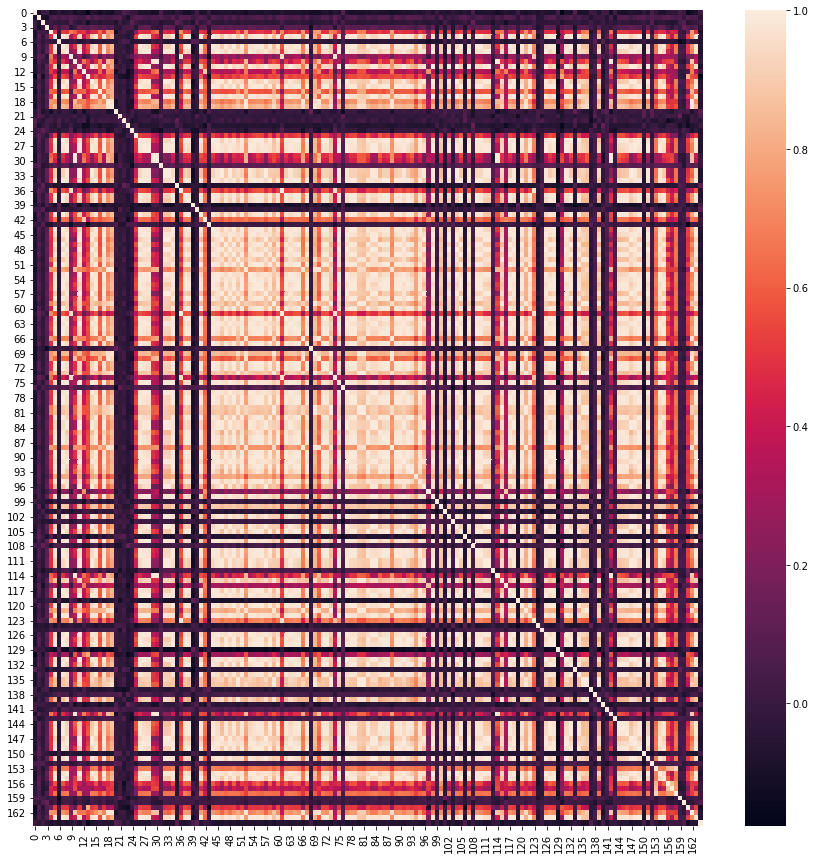

In [71]:
similarity  = cosine_similarity(doc2vec_df, doc2vec_df)
a4_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=similarity);

# T-SNE plot word2vec

C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


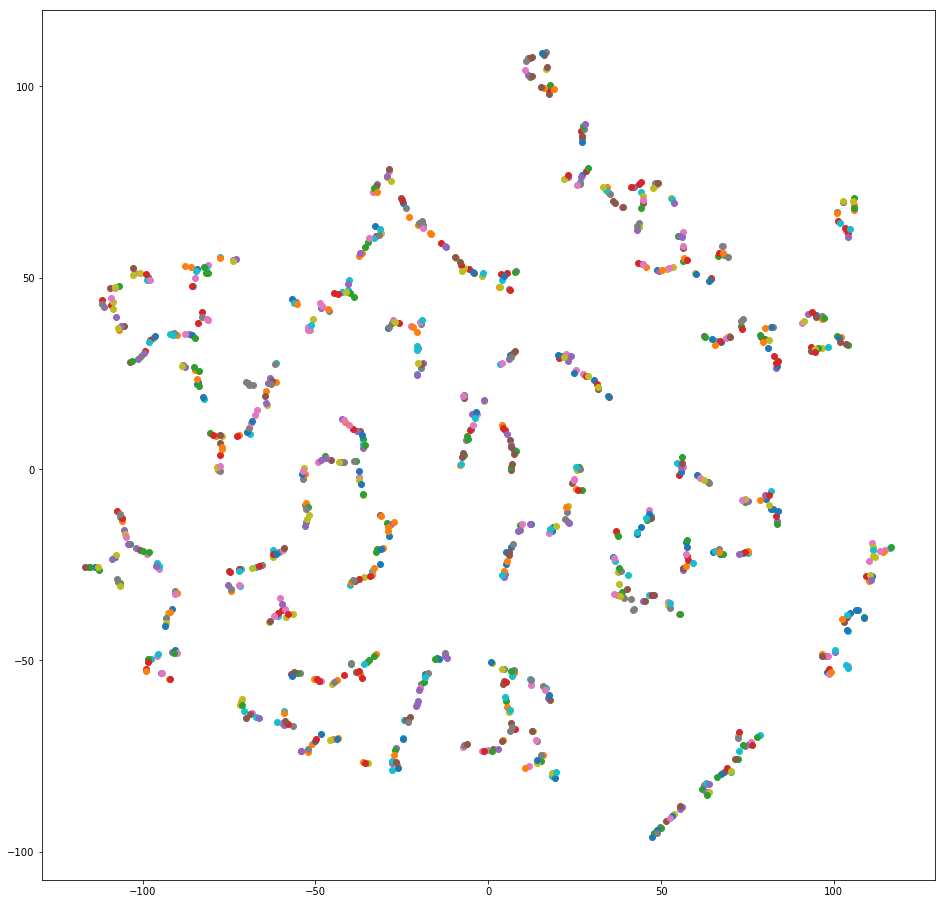

In [142]:
#visualize documents through applying TSNE to doc2vec matrix
pca = PCA(n_components=2).fit(w2v_df)
X_pca = pca.transform(w2v_df)
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
doc2vec_df = tsne_model.fit_transform(X_pca)
x = []
y = []
for value in doc2vec_df:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    #plt.annotate(titles[i],
#                  xy=(x[i], y[i]),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom')
plt.show()

# T-SNE plot doc2vec

C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


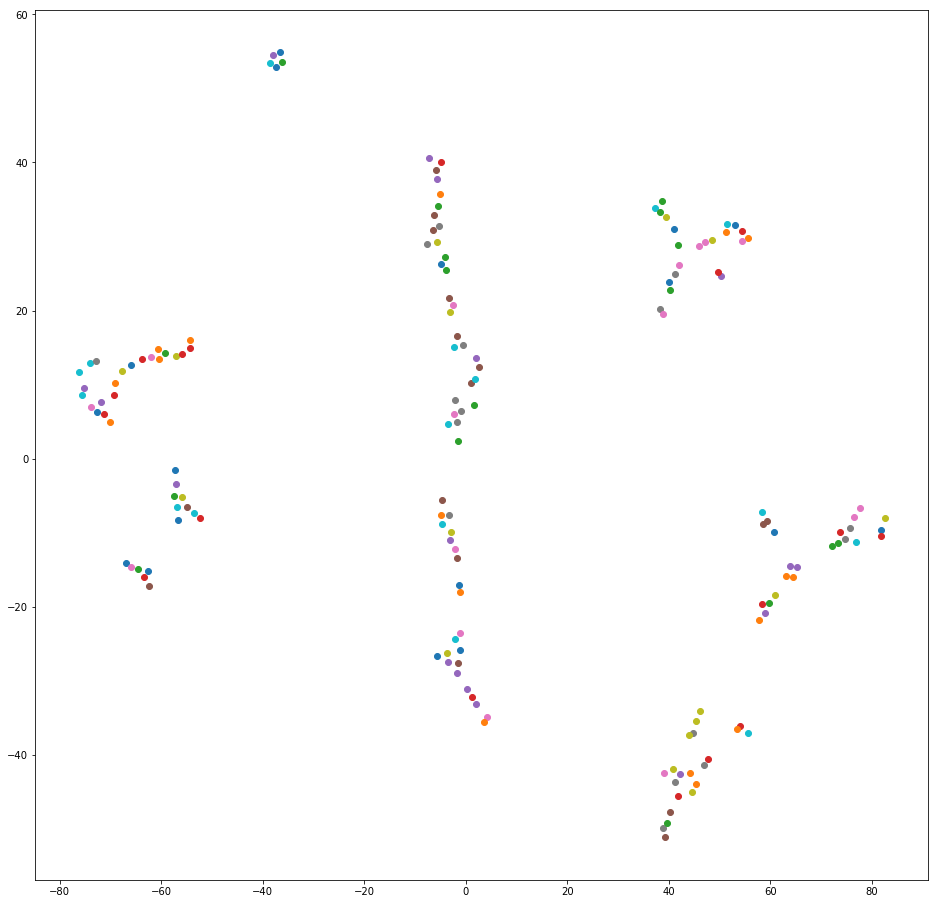

In [72]:
# T-SNE plot doc2vec

#visualize documents through applying TSNE to doc2vec matrix
pca = PCA(n_components=2).fit(doc2vec_df)
X_pca = pca.transform(doc2vec_df)
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
doc2vec_df = tsne_model.fit_transform(X_pca)
x = []
y = []
for value in doc2vec_df:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    #plt.annotate(titles[i],
#                  xy=(x[i], y[i]),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom')
plt.show()

# T-SNE TFIDF

C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\hag8665\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


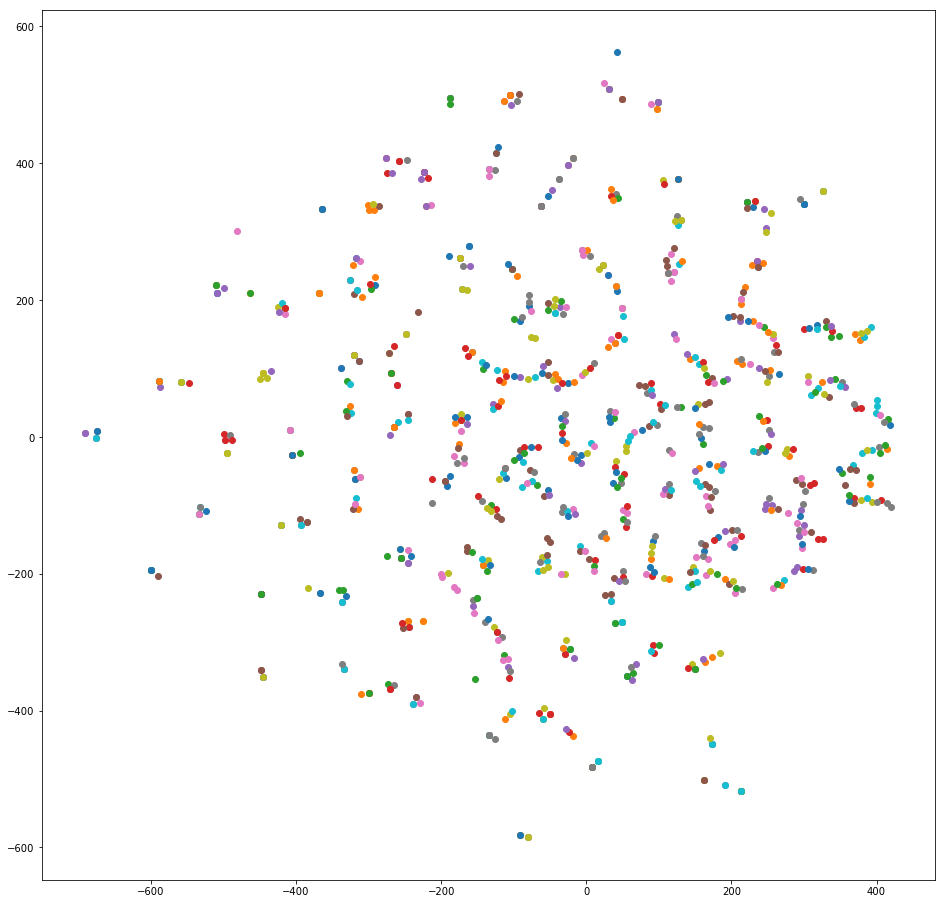

In [48]:
#visualize documents through applying TSNE to doc2vec matrix
pca = PCA(n_components=2).fit(matrix_tfidf.T)
X_pca = pca.transform(matrix_tfidf.T)
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
tfidf_df = tsne_model.fit_transform(X_pca)
x = []
y = []
for value in tfidf_df:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    #plt.annotate(titles[i],
#                  xy=(x[i], y[i]),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom')
plt.show()

# use K-means to get cluster for tfidf

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [113]:
kmeans =  KMeans(n_clusters=160, random_state =89)

kmdata= kmeans.fit_transform(df)

In [105]:
kdf = pd.DataFrame(PCA(n_components=2).fit_transform(X),columns= ['x','y'])

In [110]:
kdf = kdf.assign(cluster = kmeans.labels_)

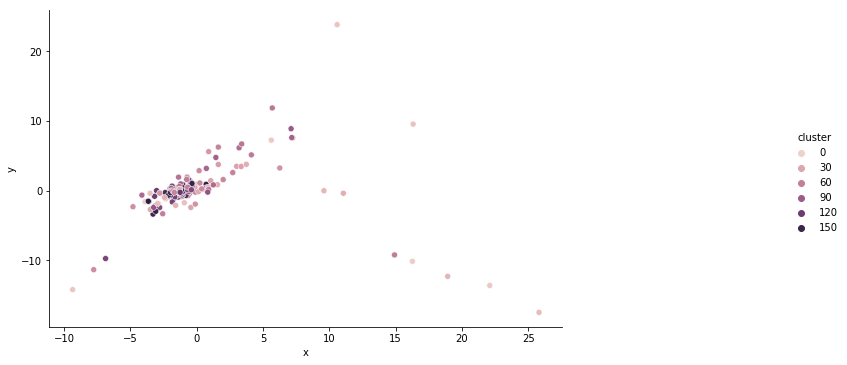

In [111]:
g = sns.pairplot(x_vars="x", y_vars="y", hue="cluster", data = kdf)
g.fig.set_size_inches(14, 6)

In [102]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

In [90]:
def LemNormalize(text):
    return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

In [91]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [106]:
def response(user_response):
    robo_response=''
    clean_token.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(clean_token)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+clean_token[idx]
        # answer = nlp({
        #               'question': f'{user_response}',
        #               'context': robo_response
        #           })
        return  robo_response #answer['answer'] 

In [107]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
          
                print("ROBO: ",end="")
                print(response(user_response))
                clean_token.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
what is pe ratio
ROBO: debt ratio total liabilities total assets measures the portion of company assets that is financed by debt obligations to third parties debt ratio can also be computed using the formula 1 minus equity ratio
what is price to equity ratio
ROBO: equity ratio total equity total assets determines the portion of total assets provided by equity i e owners contributions and the company s accumulated profits equity ratio can also be computed using the formula 1 minus debt ratio the reciprocal of equity ratio is known as equity multiplier which is equal to total assets divided by total equity
what is shares
ROBO: shareholder an owner of shares in an investment fund or corporation
exit
ROBO: I am sorry! I don't understand you
bye
ROBO: Bye! take care..


In [1]:
import pdfplumber

ModuleNotFoundError: No module named 'pdfplumber'

In [1]:
import pdfplumber

In [2]:
pdf = pdfplumber.open(r'C:\Users\hag8665\Desktop\MSDS 436\Final_project\Sample 1- Target Holiday Sentiment.pdf')

In [14]:
page = pdf.pages[7]
page.extract_text()

'METHODOLOGY & TOOLS\nAnalytics System Workflow Description\nSentiment Analysis on Retailer’s Customer Reviews Scraped from Internet'